In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df_lugemine_1 = pd.read_csv("../data/action_wise_data/reading_1.csv", index_col=0)
df_suhtlus_1 = pd.read_csv("../data/action_wise_data/communication_1.csv", index_col=0)
df_scroll_1 = pd.read_csv("../data/action_wise_data/scrolling_1.csv", index_col=0)
df_arvuti_1 = pd.read_csv("../data/action_wise_data/computer_1.csv", index_col=0)

df_lugemine_2 = pd.read_csv("../data/action_wise_data/reading_2.csv", index_col=0)
df_suhtlus_2 = pd.read_csv("../data/action_wise_data/communication_2.csv", index_col=0)
df_scroll_2 = pd.read_csv("../data/action_wise_data/scrolling_2.csv", index_col=0)
df_arvuti_2 = pd.read_csv("../data/action_wise_data/computer_2.csv", index_col=0)

df_lugemine_3 = pd.read_csv("../data/action_wise_data/reading_3.csv", index_col=0)
df_suhtlus_3 = pd.read_csv("../data/action_wise_data/communication_3.csv", index_col=0)
df_scroll_3 = pd.read_csv("../data/action_wise_data/scrolling_3.csv", index_col=0)
df_arvuti_3 = pd.read_csv("../data/action_wise_data/computer_3.csv", index_col=0)

In [35]:
df_big = pd.concat([df_lugemine_1, df_suhtlus_1, df_scroll_1, df_arvuti_1, df_lugemine_2, df_suhtlus_2, df_scroll_2, df_arvuti_2, df_lugemine_3, df_suhtlus_3, df_scroll_3, df_arvuti_3], ignore_index=True)

In [36]:
df_big.columns

Index(['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5',
       'epoch', 'tick', 'x', 'y', 'z', 'time', 'label'],
      dtype='object')

In [37]:
scaler = StandardScaler()
df_big_scaled = pd.DataFrame(scaler.fit_transform(df_big[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']]),
                             columns=['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z'])
df_big_scaled["time"] = df_big["time"]

ohe = OneHotEncoder()
ohe.fit(df_big[["label"]])

df_big_scaled[[cat for cat in ohe.categories_[0]]] = ohe.transform(df_big[["label"]]).toarray()

# for col in df_big_scaled.columns:
#     if col not in ["time", "label"]:
#         df_big_scaled[col] = pd.to_numeric(df_big_scaled[col]).astype(np.uint8)

df_big_scaled.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,x,y,z,time,communication,computer,reading,scrolling
0,0.535408,0.037584,0.119232,0.932200,1.067751,0.058123,-0.653354,-0.882907,-1.076118,0.961621,0.884534,-0.144164,1.917147,0.877331,-1.581244,2023-11-03 08:55:23.681236,0.0,0.0,1.0,0.0
1,0.548286,0.060216,0.156784,0.945445,1.073017,0.066887,-0.631147,-0.836631,-1.058522,0.964983,0.868899,-0.126897,1.724858,0.858034,-1.541047,2023-11-03 08:55:23.697962,0.0,0.0,1.0,0.0
2,0.554725,0.045731,0.164903,0.947101,1.095585,0.068530,-0.614635,-0.850514,-1.049724,0.986275,0.862645,-0.130495,2.209950,0.512458,-1.592298,2023-11-03 08:55:23.714657,0.0,0.0,1.0,0.0
3,0.560406,0.078322,0.168963,0.952896,1.100851,0.077842,-0.608941,-0.864397,-1.023331,0.980672,0.869792,-0.115387,2.100695,1.045733,-1.544062,2023-11-03 08:55:23.731351,0.0,0.0,1.0,0.0
4,0.567602,0.071985,0.168963,0.957449,1.088438,0.083867,-0.595275,-0.864397,-1.033595,0.993746,0.847456,-0.112509,1.956479,0.573854,-1.680731,2023-11-03 08:55:23.748016,0.0,0.0,1.0,0.0


In [38]:
df_big_scaled.shape

(144600, 20)

In [39]:
df_lugemine_1.head()

,l0,l1,l2,l3,l4,l5,r0,r1,r2,r3,r4,r5,epoch,tick,x,y,z,time,label
6000,18620,6055,9518,15944,17230,17145,20309,5161,7226,14782,13313,7951,1699001723681236,3816428,1.645065,9.703680,-0.318716,2023-11-03 08:55:23.681236,reading
6001,18654,6080,9555,15976,17244,17161,20348,5191,7238,14791,13278,7975,1699001723697962,3816444,1.537192,9.676711,-0.220649,2023-11-03 08:55:23.697962,reading
6002,18671,6064,9563,15980,17304,17164,20377,5182,7244,14848,13264,7970,1699001723714657,3816461,1.809326,9.193734,-0.345684,2023-11-03 08:55:23.714657,reading
6003,18686,6100,9567,15994,17318,17181,20387,5173,7262,14833,13280,7991,1699001723731351,3816478,1.748035,9.939039,-0.228004,2023-11-03 08:55:23.731351,reading
6004,18705,6093,9567,16005,17285,17192,20411,5173,7255,14868,13230,7995,1699001723748016,3816494,1.667130,9.279542,-0.561430,2023-11-03 08:55:23.748016,reading


In [40]:
def scale_small_df(df, scaler, ohe):
    df_scaled = pd.DataFrame(scaler.fit_transform(df[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']]),
                                columns=['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z'])

    df_scaled["time"] = df["time"].values

    df_scaled[[cat for cat in ohe.categories_[0]]] = ohe.transform(df[["label"]]).toarray()

    # for col in df_scaled.columns:
    #     if col not in ["time", "label"]:
    #         df_scaled[col] = pd.to_numeric(df_scaled[col]).astype(np.uint8)

    return df_scaled

def scaled2image(df):
    data_array = df[['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'r0', 'r1', 'r2', 'r3', 'r4', 'r5', 'x', 'y', 'z']].to_numpy()
    y_array = df[['communication','computer','reading','scrolling']].to_numpy()
    # Create the rolling slices
    window_size = 60*2 # Size of each slice
    rolling_slices = np.array([data_array[i:i+window_size] for i in range(0, len(data_array) - window_size + 1, window_size)])
    y_array = np.array([y_array[i+window_size-1] for i in range(0, len(data_array) - window_size + 1, window_size )])
    return rolling_slices, y_array

dfff = scale_small_df(df_lugemine_1, scaler, ohe)
rolling_slices, y_array = scaled2image(dfff)

# saving images for later ml

In [41]:
all_rolling_slices = []
all_y_array = []

for df in [df_lugemine_1, df_suhtlus_1, df_scroll_1, df_arvuti_1, df_lugemine_2, df_suhtlus_2, df_scroll_2, df_arvuti_2, df_lugemine_3, df_suhtlus_3, df_scroll_3, df_arvuti_3]:
    df = scale_small_df(df, scaler, ohe)
    rolling_slices, y_array = scaled2image(df)
    all_rolling_slices.extend(rolling_slices)
    all_y_array.extend(y_array)

all_rolling_slices = np.array(all_rolling_slices)
all_y_array = np.array(all_y_array)


In [42]:
np.save("../data/ML/rolling_slices.npy", all_rolling_slices)
np.save("../data/ML/y_array.npy", all_y_array)

In [43]:
all_rolling_slices.shape

(1199, 120, 15)

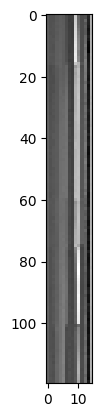

In [44]:
plt.imshow(all_rolling_slices[34], cmap="gray")

In [45]:
all_rolling_slices[0]

array([[ 0.34237083, -0.23453863, -0.1760055 , ...,  1.24315973,
         1.00053062, -1.60218603],
       [ 0.3599085 , -0.20993787, -0.13131383, ...,  1.06074457,
         0.95057263, -1.54458523],
       [ 0.36867734, -0.22568236, -0.12165076, ...,  1.520928  ,
         0.05589509, -1.618026  ],
       ...,
       [ 0.80969828,  0.37949648,  0.35787879, ...,  1.81942646,
         2.29940309, -1.42506417],
       [ 0.80247688,  0.3578478 ,  0.44122271, ...,  2.17181934,
        -1.16123182, -1.50282499],
       [ 0.80092944,  0.34407138,  0.35908667, ...,  1.76967671,
         1.83162746, -1.29834382]])

## Data legend
0. communication
1. computer
2. reading
3. telo